# Polynomial Regression Explanation

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [67]:
#create the regression model
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

plt.figure()
X, y = make_regression(n_samples = 50, n_features=1,
                            n_informative=2, bias = 20,
                            noise = 30, random_state=2)


<Figure size 432x288 with 0 Axes>

Linear Regression
Coeffecient:  [35.89470225]
Intercept:  21.68504478627754

Polynomial Regression
Coeffecient:  [36.63706385  4.84618052]
Intercept:  10.581908496118023


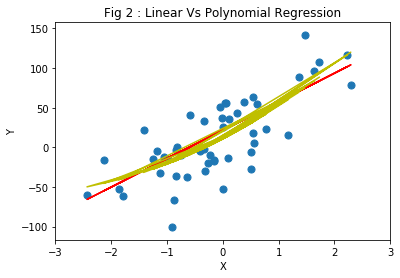

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =2)

reg = LinearRegression().fit(X_train, y_train)
coeffecient = reg.coef_

#find regressor intercept
intercept = reg.intercept_
print('Linear Regression\nCoeffecient: ',coeffecient)
print('Intercept: ', intercept)

#polynomial reg model
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)
#poly.fit(X_poly, y)

Poly_reg = LinearRegression().fit(X_poly, y)
y_poly = Poly_reg.predict(X_poly)
print('\nPolynomial Regression\nCoeffecient: ',Poly_reg.coef_)
print('Intercept: ', Poly_reg.intercept_)

plt.xlim(-3,3)

plt.plot(X, coeffecient*X+ intercept,'r' )
plt.plot(X, y_poly, 'y')
plt.scatter(X, y, marker= 'o', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fig 2 : Linear Vs Polynomial Regression')

plt.show()

# Case study

Let's look at the covid-19 predictors data set and estimate the recovery rate of a given country on a future date.


[data source : https://www.kaggle.com/nightranger77/covid19-demographic-predictors]


In [86]:
import pandas as pd
import os

#finding path, ugh don't ask!
path, file = os.path.split(os.path.abspath("covid_19_data.csv"))
path = path+'\data\\'

#loading data
data = pd.read_csv(path+file)
data.shape

(59759, 8)

In [87]:
#rename pesky column names
data.rename(columns = {'Province/State': 'State','Country/Region':'Country'}, inplace=True)

#dropping unneccessary columns
data.drop(labels=['SNo','Last Update','State'], axis=1, inplace=True)

#changing dtype of date column
data['ObservationDate']=pd.to_datetime(data['ObservationDate'])
data.head()

,ObservationDate,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [105]:
#grouping stats for each day
grouped = data.groupby(['Country','ObservationDate'])

#creating new df
df = pd.DataFrame(columns =data.columns)
i=0
country =[]
date=[]
conf =[]
rec=[]
dead =[]
for groupinfo, stats in grouped:
    country.append(groupinfo[0])
    date.append(groupinfo[1])
    rec.append(np.sum(stats['Recovered']))
    dead.append(np.sum(stats['Deaths']))
    conf.append(np.sum(stats['Confirmed']))

df['ObservationDate'] =date 
df['Country'] = country
df['Confirmed'] = conf
df['Deaths'] = dead
df['Recovered']= rec

In [106]:
print(df.shape)
df

(24201, 5)


,ObservationDate,Country,Confirmed,Deaths,Recovered
0,2020-02-28,Azerbaijan,1.0,0.0,0.0
1,2020-03-10,"('St. Martin',)",2.0,0.0,0.0
2,2020-02-24,Afghanistan,1.0,0.0,0.0
3,2020-02-25,Afghanistan,1.0,0.0,0.0
4,2020-02-26,Afghanistan,1.0,0.0,0.0
...,...,...,...,...,...
24196,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0
24197,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0
24198,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0
24199,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0


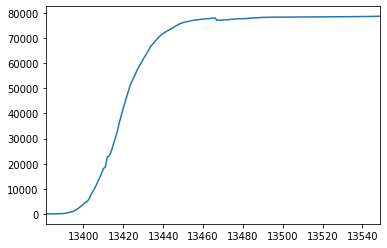

In [112]:
#just checking to see if the data has potential for polynomial model, by the looks of it, oh yes!
df[df['Country']=='Mainland China']['Recovered'].plot()

In [126]:
#create label encoder instance
le = LabelEncoder()

#fit into labelencoder and get labels
labels = le.fit_transform(df['Country'])

#set labels to country
df['Country'] = labels
df.head()

,ObservationDate,Country,Confirmed,Deaths,Recovered
0,2020-02-28,0,1.0,0.0,0.0
1,2020-03-10,1,2.0,0.0,0.0
2,2020-02-24,2,1.0,0.0,0.0
3,2020-02-25,2,1.0,0.0,0.0
4,2020-02-26,2,1.0,0.0,0.0


In [127]:
#splitting data
features = ['Country','Confirmed','Deaths']
target = 'Recovered'
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size =0.2, random_state=0)
X_train.shape, X_test.shape

((19360, 3), (4841, 3))

In [133]:
#create polynomial features
poly = PolynomialFeatures(degree =2 )

#fit X_train
X_poly = poly.fit_transform(X_train)

#create and fit into linear model
poly_reg = LinearRegression().fit(X_poly, y_train)

#make predictions
y_pred = poly_reg.predict(poly.transform(X_test))

#validate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: {}'.format(mse))
print('R-squared Error: {}'.format(r2))

Mean Squared Error: 190869184.0756124
R-squared Error: 0.8984295871261034
